In [1]:
import numpy as np
import pandas as pd

In [2]:
matches=pd.read_csv('matches.csv')

In [3]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
deliveries=pd.read_csv('deliveries.csv')

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [7]:
total_score=deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [8]:
total_score

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [9]:
total_score=total_score[total_score['inning']==1]

In [10]:
total_score

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [11]:
match=matches.merge(total_score[['match_id','total_runs']],left_on='id',right_on='match_id')

In [12]:
match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [13]:
match['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [14]:
match.loc[match['city'] == 'Bangalore', 'city'] = 'Bengaluru'

In [15]:
match['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [16]:
teams=[
       'Royal Challengers Bengaluru','Mumbai Indians','Kolkata Knight Riders','Rajasthan Royals', 'Chennai Super Kings','Sunrisers Hyderabad',
       'Delhi Capitals', 'Punjab Kings','Lucknow Super Giants', 'Gujarat Titans'   
]

In [17]:
match.loc[match['team1'] == 'Royal Challengers Bangalore', 'team1'] = 'Royal Challengers Bengaluru'
match.loc[match['team2'] == 'Royal Challengers Bangalore', 'team2'] = 'Royal Challengers Bengaluru'

match.loc[match['team1'] == 'Delhi Daredevils', 'team1'] = 'Delhi Capitals'
match.loc[match['team2'] == 'Delhi Daredevils', 'team2'] = 'Delhi Capitals'

match.loc[match['team1'] == 'Deccan Chargers', 'team1'] = 'Sunrisers Hyderabad'
match.loc[match['team2'] == 'Deccan Chargers', 'team2'] = 'Sunrisers Hyderabad'

match.loc[match['team1'] == 'Kings XI Punjab', 'team1'] = 'Punjab Kings'
match.loc[match['team2'] == 'Kings XI Punjab', 'team2'] = 'Punjab Kings'

In [18]:
match= match[match['team1'].isin(teams)]
match= match[match['team2'].isin(teams)]

In [19]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [20]:
match['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [21]:
match['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [22]:
match.shape

(980, 22)

In [23]:
match.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'total_runs'],
      dtype='object')

In [24]:
match[['method']].value_counts()

method
D/L       17
Name: count, dtype: int64

In [25]:
a= match.loc[match['method'] == 'D/L']
a

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Capitals,Punjab Kings,Delhi Daredevils,...,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen,336022,118
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,...,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan,336025,149
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Capitals,Punjab Kings,Delhi Daredevils,...,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade,392183,104
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,...,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade,392186,158
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Punjab Kings,Chennai Super Kings,...,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene,392214,185
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,...,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel,501245,114
231,501255,2011,Bengaluru,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,wickets,4.0,102.0,13.0,N,D/L,RE Koertzen,RB Tiffin,501255,89
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,...,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford,733993,143
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,...,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni,829743,176
508,829807,2015,Hyderabad,2015-05-15,League,V Kohli,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,...,wickets,6.0,81.0,6.0,N,D/L,AK Chaudhary,HDPK Dharmasena,829807,135


In [26]:
match= match.loc[match['method'] != 'D/L']

In [27]:
match

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bengaluru,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [28]:
a= match.loc[match['method'] == 'D/L']
a

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs


In [29]:
import warnings 
warnings.filterwarnings("ignore")
match.drop('match_id',axis=1,inplace=True)

In [30]:
match = match.rename(columns={'id': 'match_id'})

In [31]:
match.columns

Index(['match_id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'total_runs'],
      dtype='object')

In [32]:
match = match[['match_id','city','winner','total_runs']]

In [33]:
match

,match_id,city,winner,total_runs
0,335982,Bengaluru,Kolkata Knight Riders,222
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
1090,1426307,Hyderabad,Sunrisers Hyderabad,214
1091,1426309,Ahmedabad,Kolkata Knight Riders,159
1092,1426310,Ahmedabad,Rajasthan Royals,172
1093,1426311,Chennai,Sunrisers Hyderabad,175


In [34]:
delivery=match.merge(deliveries, on='match_id' )

In [35]:
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bengaluru,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bengaluru,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bengaluru,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bengaluru,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bengaluru,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [36]:
delivery=delivery.loc[delivery['inning']==2]

In [37]:
delivery.shape

(111721, 20)

In [38]:
delivery.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [39]:
delivery.groupby('match_id')['total_runs_y'].cumsum()

124         1
125         2
126         2
127         3
128         4
         ... 
230977    110
230978    111
230979    112
230980    113
230981    114
Name: total_runs_y, Length: 111721, dtype: int64

In [40]:
delivery['currunt_score'] = delivery.groupby('match_id')['total_runs_y'].cumsum()

In [41]:
delivery['total_runs_x'] = delivery['total_runs_x'] + 1

In [42]:
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,currunt_score
124,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [43]:
delivery['runs_left'] = delivery['total_runs_x'] - delivery['currunt_score'] 

In [44]:
delivery.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left
124,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,222
125,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,221
126,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221
127,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,220
128,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,219


In [45]:
delivery['balls_left'] = 120 - (delivery['over']*6 + delivery['ball'])

In [127]:
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left,balls_left,wickets_left,currunt_run_rate,required_run_rate,result
124,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,222,119,10,6.0,11.193277,0
125,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,221,118,10,6.0,11.237288,0
126,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,221,117,10,4.0,11.333333,0
127,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,220,116,10,4.5,11.379310,0
128,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,219,115,10,4.8,11.426087,0


In [46]:
delivery.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left,balls_left
230977,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,4,61
230978,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,3,60
230979,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,2,59
230980,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,1,58
230981,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,114,0,57


In [47]:
delivery['player_dismissed'] = delivery['player_dismissed'].fillna(0)

In [48]:
delivery.loc[delivery['player_dismissed'] != 0, 'player_dismissed'] = 1

In [49]:
delivery['player_dismissed'].value_counts()

player_dismissed
0    106168
1      5553
Name: count, dtype: int64

In [50]:
delivery['player_dismissed'] = delivery['player_dismissed'].astype(int)

In [51]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111721 entries, 124 to 230981
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          111721 non-null  int64 
 1   city              105709 non-null  object
 2   winner            111694 non-null  object
 3   total_runs_x      111721 non-null  int64 
 4   inning            111721 non-null  int64 
 5   batting_team      111721 non-null  object
 6   bowling_team      111721 non-null  object
 7   over              111721 non-null  int64 
 8   ball              111721 non-null  int64 
 9   batter            111721 non-null  object
 10  bowler            111721 non-null  object
 11  non_striker       111721 non-null  object
 12  batsman_runs      111721 non-null  int64 
 13  extra_runs        111721 non-null  int64 
 14  total_runs_y      111721 non-null  int64 
 15  extras_type       6028 non-null    object
 16  is_wicket         111721 non-null  int64 

In [52]:
wickets = delivery.groupby('match_id')['player_dismissed'].cumsum()

In [53]:
delivery['wickets_left']= 10- wickets

In [54]:
delivery.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left,balls_left,wickets_left
230977,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,4,61,8
230978,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,3,60,8
230979,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,2,59,8
230980,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,1,58,8
230981,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,0,57,8


In [55]:
delivery['currunt_run_rate']= (delivery['currunt_score'])*6/(120 - delivery['balls_left'])

In [56]:
delivery['required_run_rate']= (delivery['runs_left'])*6/delivery['balls_left']  

In [57]:
delivery.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left,balls_left,wickets_left,currunt_run_rate,required_run_rate
124,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,222,119,10,6.0,11.193277
125,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,221,118,10,6.0,11.237288
126,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,221,117,10,4.0,11.333333
127,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,220,116,10,4.5,11.379310
128,335982,Bengaluru,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,219,115,10,4.8,11.426087


In [58]:
delivery['result'] = np.where(delivery['winner'] == delivery['batting_team'], 1, 0)

In [59]:
delivery.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,currunt_score,runs_left,balls_left,wickets_left,currunt_run_rate,required_run_rate,result
230977,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,NaN,NaN,110,4,61,8,11.186441,0.393443,1
230978,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,NaN,NaN,111,3,60,8,11.100000,0.300000,1
230979,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,NaN,NaN,112,2,59,8,11.016393,0.203390,1
230980,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,NaN,NaN,113,1,58,8,10.935484,0.103448,1
230981,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,0,NaN,NaN,114,0,57,8,10.857143,0.000000,1


In [60]:
delivery.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs_y', 'extras_type',
       'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder',
       'currunt_score', 'runs_left', 'balls_left', 'wickets_left',
       'currunt_run_rate', 'required_run_rate', 'result'],
      dtype='object')

In [61]:
delivery[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','currunt_run_rate','required_run_rate','result']]

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,currunt_run_rate,required_run_rate,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,222,119,10,223,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,221,118,10,223,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,221,117,10,223,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,220,116,10,223,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,219,115,10,223,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
230977,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,114,11.186441,0.393443,1
230978,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,114,11.100000,0.300000,1
230979,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,114,11.016393,0.203390,1
230980,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,114,10.935484,0.103448,1


In [62]:
df=delivery[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','currunt_run_rate','required_run_rate','result']]

In [63]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,currunt_run_rate,required_run_rate,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,222,119,10,223,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,221,118,10,223,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,221,117,10,223,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,220,116,10,223,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bengaluru,219,115,10,223,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
230977,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,8,114,11.186441,0.393443,1
230978,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,8,114,11.100000,0.300000,1
230979,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,8,114,11.016393,0.203390,1
230980,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,8,114,10.935484,0.103448,1


In [64]:
df=df.sample(df.shape[0])

In [65]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,currunt_run_rate,required_run_rate,result
170644,Mumbai Indians,Chennai Super Kings,Delhi,67,28,7,219,9.913043,14.357143,1
13985,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,175,113,9,180,4.285714,9.292035,0
162808,Delhi Capitals,Royal Challengers Bangalore,Abu Dhabi,129,105,9,153,9.600000,7.371429,1
110021,Mumbai Indians,Kolkata Knight Riders,Mumbai,109,82,9,175,10.421053,7.975610,1
16073,Deccan Chargers,Chennai Super Kings,Durban,2,5,6,166,8.556522,2.400000,1
...,...,...,...,...,...,...,...,...,...,...
206997,Gujarat Titans,Delhi Capitals,Ahmedabad,51,29,6,131,5.274725,10.551724,0
54036,Kolkata Knight Riders,Rajasthan Royals,Kolkata,106,90,9,132,5.200000,7.066667,1
216775,Gujarat Titans,Sunrisers Hyderabad,Ahmedabad,96,69,9,163,7.882353,8.347826,1
117550,Mumbai Indians,Kings XI Punjab,Indore,70,59,9,199,12.688525,7.118644,1


In [66]:
df = df.reset_index(drop=True)

In [67]:
df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,currunt_run_rate,required_run_rate,result
0,Mumbai Indians,Chennai Super Kings,Delhi,67,28,7,219,9.913043,14.357143,1
1,Royal Challengers Bangalore,Chennai Super Kings,Port Elizabeth,175,113,9,180,4.285714,9.292035,0
2,Delhi Capitals,Royal Challengers Bangalore,Abu Dhabi,129,105,9,153,9.600000,7.371429,1
3,Mumbai Indians,Kolkata Knight Riders,Mumbai,109,82,9,175,10.421053,7.975610,1
4,Deccan Chargers,Chennai Super Kings,Durban,2,5,6,166,8.556522,2.400000,1
...,...,...,...,...,...,...,...,...,...,...
111716,Gujarat Titans,Delhi Capitals,Ahmedabad,51,29,6,131,5.274725,10.551724,0
111717,Kolkata Knight Riders,Rajasthan Royals,Kolkata,106,90,9,132,5.200000,7.066667,1
111718,Gujarat Titans,Sunrisers Hyderabad,Ahmedabad,96,69,9,163,7.882353,8.347826,1
111719,Mumbai Indians,Kings XI Punjab,Indore,70,59,9,199,12.688525,7.118644,1


In [68]:
df.isnull().sum()

batting_team            0
bowling_team            0
city                 6012
runs_left               0
balls_left              0
wickets_left            0
total_runs_x            0
currunt_run_rate        0
required_run_rate      16
result                  0
dtype: int64

In [69]:
df.dropna(inplace=True)

In [70]:
df.isnull().sum()

batting_team         0
bowling_team         0
city                 0
runs_left            0
balls_left           0
wickets_left         0
total_runs_x         0
currunt_run_rate     0
required_run_rate    0
result               0
dtype: int64

In [71]:
df= df[df['balls_left'] != 0]

In [72]:
df = df.reset_index(drop=True)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
def outlier_treatment(col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    outliers=df[(df[col]<lf) | (df[col]>uf)]
    print('Print percentage of outlier in',col,outliers.shape[0]*100/df.shape[0])
    fig,ax=plt.subplots(1,2, figsize=(8,6))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]=df[col].median()

Print percentage of outlier in runs_left 0.07119599783564166


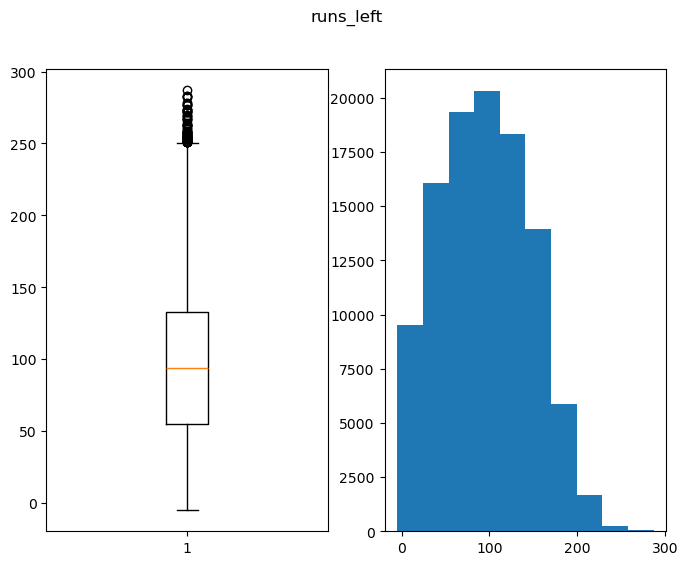

None
--------------------------------
Print percentage of outlier in balls_left 0.0


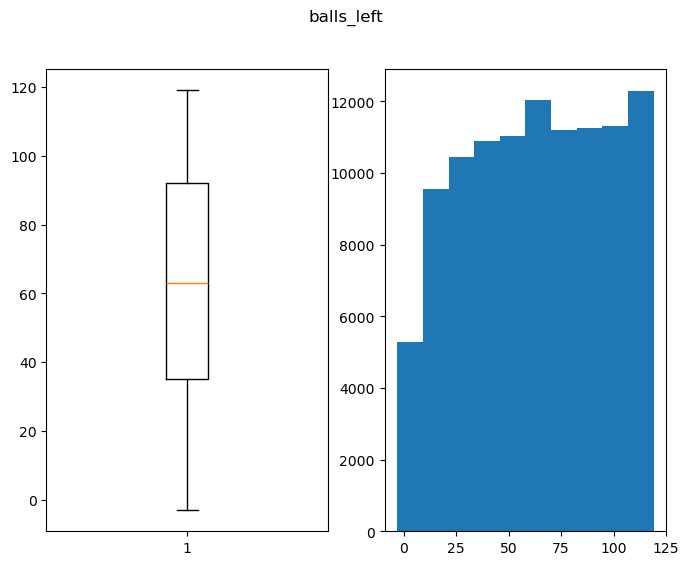

None
--------------------------------
Print percentage of outlier in wickets_left 1.0926212467843142


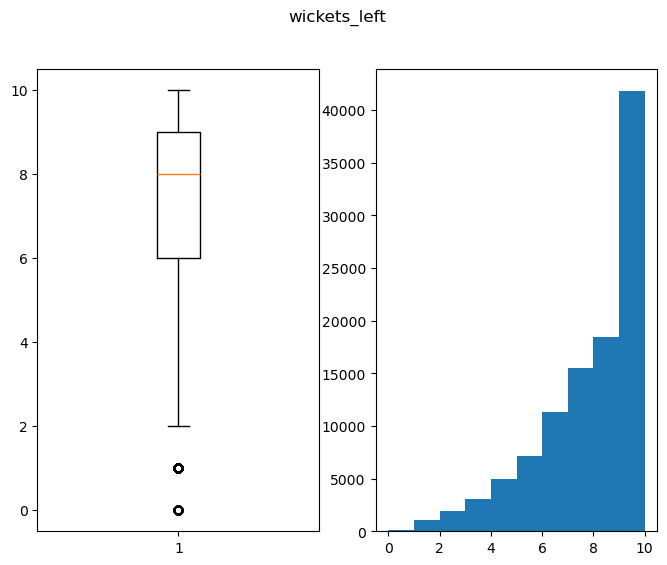

None
--------------------------------
Print percentage of outlier in total_runs_x 1.6213701907103462


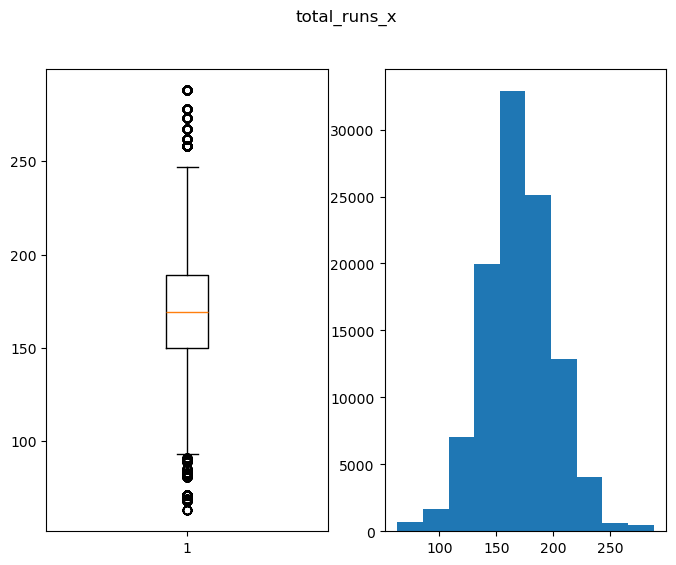

None
--------------------------------
Print percentage of outlier in currunt_run_rate 4.74924769562287


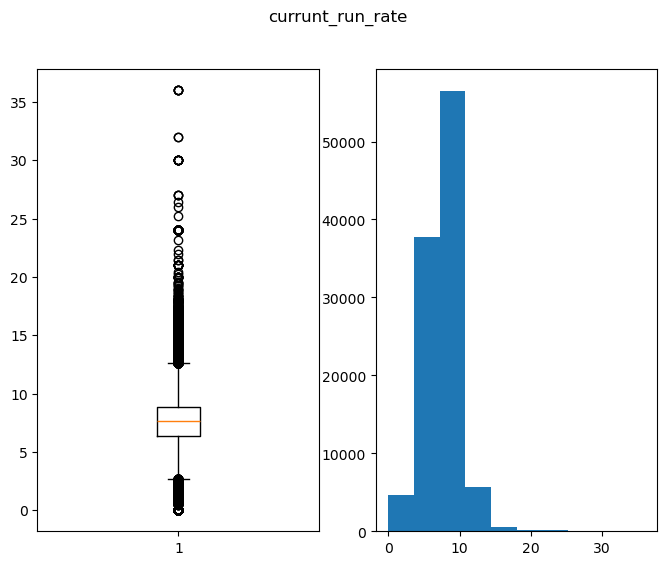

None
--------------------------------
Print percentage of outlier in required_run_rate 8.310946147347238


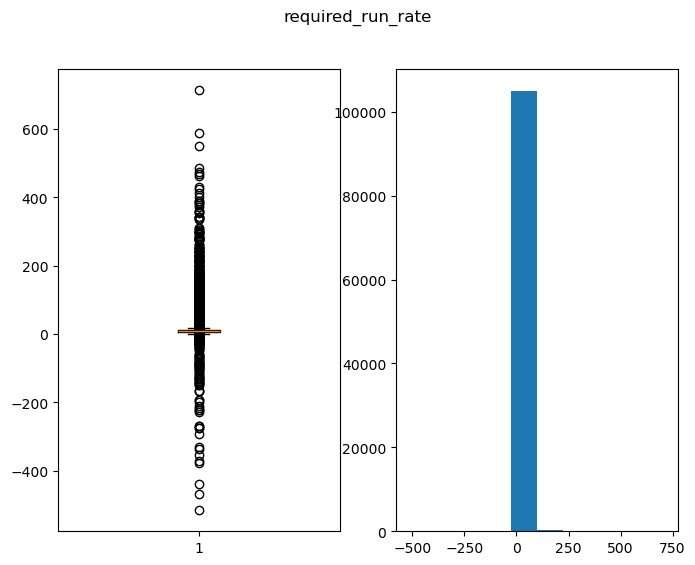

None
--------------------------------
Print percentage of outlier in result 0.0


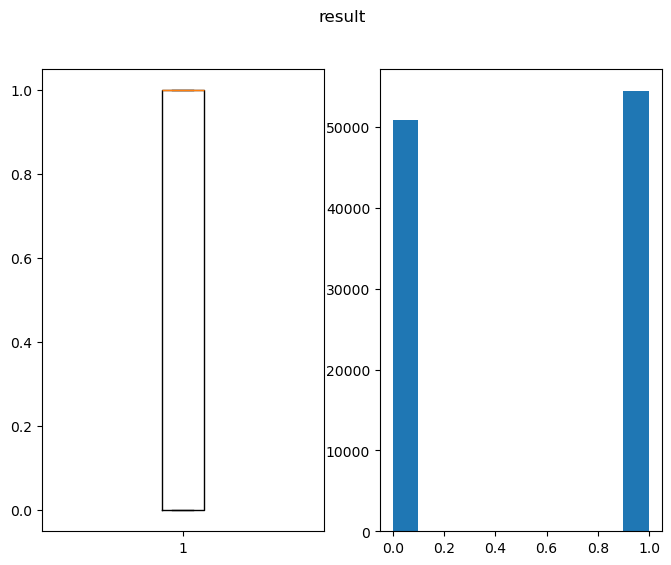

None
--------------------------------


In [75]:
for col in df.select_dtypes(include='number'):
    print(outlier_treatment(col))
    print('--------------------------------')

In [76]:
def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

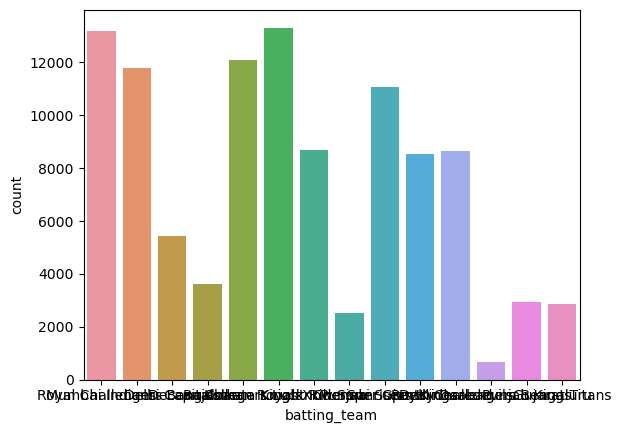

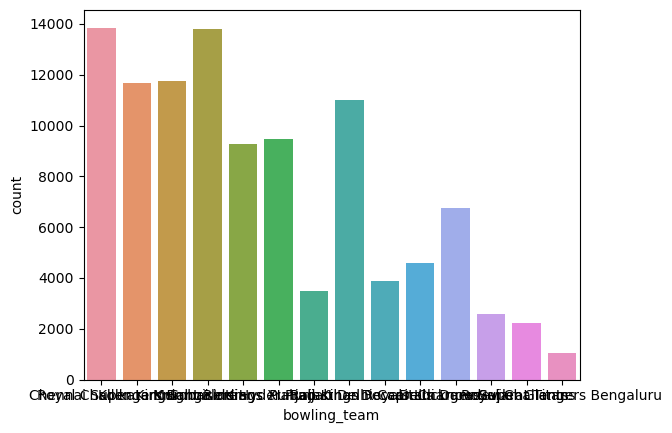

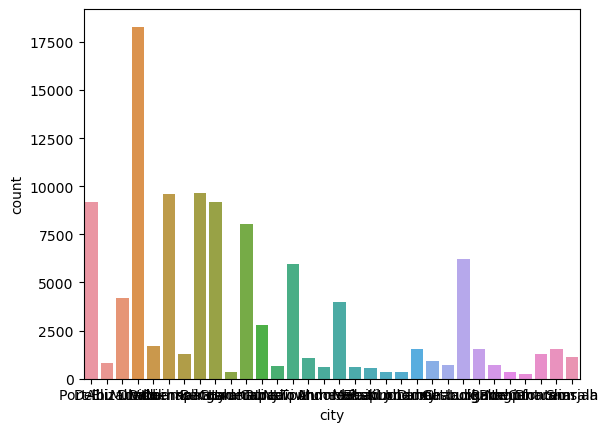

In [77]:
for col in df.select_dtypes(include='object'):
    cat_analysis(col)

In [78]:
df.select_dtypes(include='number').corr()

,runs_left,balls_left,wickets_left,total_runs_x,currunt_run_rate,required_run_rate,result
runs_left,1.000000,0.836225,0.494130,0.378783,-0.177286,0.296226,-0.257835
balls_left,0.836225,1.000000,0.740010,-0.055791,-0.145862,-0.141374,0.051071
wickets_left,0.494130,0.740010,1.000000,-0.151406,0.057636,-0.329668,0.303473
total_runs_x,0.378783,-0.055791,-0.151406,1.000000,0.328918,0.630190,-0.412178
currunt_run_rate,-0.177286,-0.145862,0.057636,0.328918,1.000000,-0.048395,0.126604
required_run_rate,0.296226,-0.141374,-0.329668,0.630190,-0.048395,1.000000,-0.502269
result,-0.257835,0.051071,0.303473,-0.412178,0.126604,-0.502269,1.000000


In [79]:
import seaborn as sns

<Axes: >

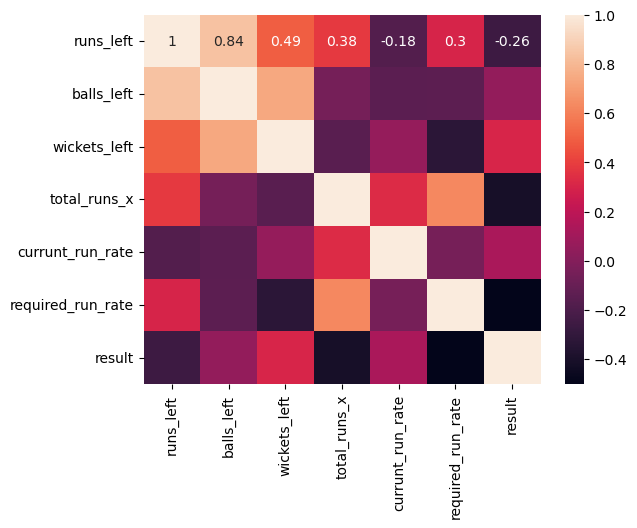

In [80]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [81]:
df.drop('balls_left', axis=1, inplace=True)

<Axes: >

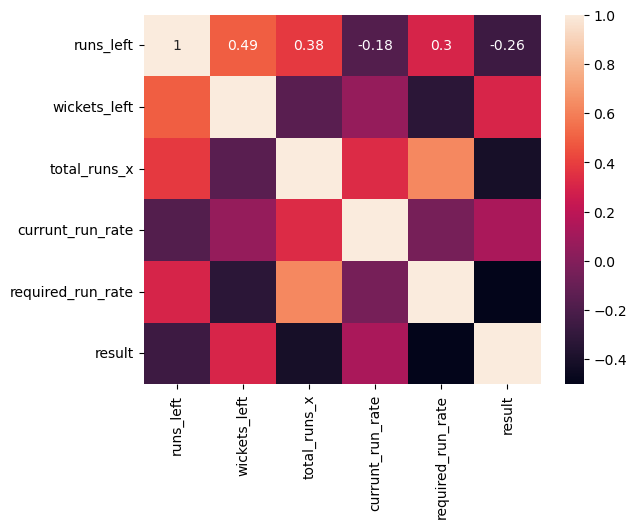

In [82]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe_batting_team=OneHotEncoder(sparse_output=False)
np_batting_team=ohe_batting_team.fit_transform(df[['batting_team']])
df_batting_team=pd.DataFrame(np_batting_team, columns=ohe_batting_team.categories_)
df_batting_team=df_batting_team.iloc[:,1:]
df_batting_team

,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Titans,Kings XI Punjab,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Punjab Kings,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105338,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105339,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105340,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [85]:
ohe_bowling_team=OneHotEncoder(sparse_output=False)
np_bowling_team=ohe_bowling_team.fit_transform(df[['bowling_team']])
df_bowling_team=pd.DataFrame(np_bowling_team, columns=ohe_bowling_team.categories_)
df_bowling_team=df_bowling_team.iloc[:,1:]
df_bowling_team

,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Titans,Kings XI Punjab,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Punjab Kings,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105338,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
105340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
105341,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
ohe_city=OneHotEncoder(sparse_output=False)
np_city=ohe_city.fit_transform(df[['city']])
df_city=pd.DataFrame(np_city, columns=ohe_city.categories_)
df_city=df_city.iloc[:,1:]
df_city

,Ahmedabad,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,Delhi,Dharamsala,...,Mohali,Mumbai,Nagpur,Navi Mumbai,Port Elizabeth,Pune,Raipur,Ranchi,Sharjah,Visakhapatnam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105340,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_city.corr()

,Ahmedabad,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,Delhi,Dharamsala,...,Mohali,Mumbai,Nagpur,Navi Mumbai,Port Elizabeth,Pune,Raipur,Ranchi,Sharjah,Visakhapatnam
Ahmedabad,1.000000,-0.061199,-0.009628,-0.015964,-0.021860,-0.049684,-0.062730,-0.016339,-0.061276,-0.023974,...,-0.015151,-0.090848,-0.011783,-0.019897,-0.017393,-0.032800,-0.014542,-0.016339,-0.020435,-0.021895
Bengaluru,-0.061199,1.000000,-0.014999,-0.024870,-0.034054,-0.077399,-0.097722,-0.025453,-0.095457,-0.037348,...,-0.023603,-0.141525,-0.018356,-0.030996,-0.027095,-0.051097,-0.022653,-0.025453,-0.031834,-0.034109
Bloemfontein,-0.009628,-0.014999,1.000000,-0.003913,-0.005358,-0.012177,-0.015374,-0.004004,-0.015018,-0.005876,...,-0.003713,-0.022266,-0.002888,-0.004877,-0.004263,-0.008039,-0.003564,-0.004004,-0.005008,-0.005366
Cape Town,-0.015964,-0.024870,-0.003913,1.000000,-0.008883,-0.020190,-0.025491,-0.006640,-0.024901,-0.009742,...,-0.006157,-0.036918,-0.004788,-0.008086,-0.007068,-0.013329,-0.005909,-0.006640,-0.008304,-0.008898
Centurion,-0.021860,-0.034054,-0.005358,-0.008883,1.000000,-0.027647,-0.034906,-0.009092,-0.034097,-0.013340,...,-0.008431,-0.050552,-0.006557,-0.011072,-0.009678,-0.018252,-0.008092,-0.009092,-0.011371,-0.012184
Chandigarh,-0.049684,-0.077399,-0.012177,-0.020190,-0.027647,1.000000,-0.079335,-0.020664,-0.077496,-0.030320,...,-0.019162,-0.114896,-0.014902,-0.025164,-0.021997,-0.041483,-0.018391,-0.020664,-0.025844,-0.027691
Chennai,-0.062730,-0.097722,-0.015374,-0.025491,-0.034906,-0.079335,1.000000,-0.026089,-0.097844,-0.038281,...,-0.024193,-0.145064,-0.018815,-0.031771,-0.027773,-0.052375,-0.023220,-0.026089,-0.032630,-0.034962
Cuttack,-0.016339,-0.025453,-0.004004,-0.006640,-0.009092,-0.020664,-0.026089,1.000000,-0.025485,-0.009971,...,-0.006301,-0.037784,-0.004901,-0.008275,-0.007234,-0.013642,-0.006048,-0.006795,-0.008499,-0.009106
Delhi,-0.061276,-0.095457,-0.015018,-0.024901,-0.034097,-0.077496,-0.097844,-0.025485,1.000000,-0.037394,...,-0.023633,-0.141702,-0.018379,-0.031035,-0.027129,-0.051161,-0.022682,-0.025485,-0.031874,-0.034151
Dharamsala,-0.023974,-0.037348,-0.005876,-0.009742,-0.013340,-0.030320,-0.038281,-0.009971,-0.037394,1.000000,...,-0.009246,-0.055441,-0.007191,-0.012142,-0.010614,-0.020017,-0.008874,-0.009971,-0.012471,-0.013362


In [88]:
X=df.drop(['batting_team','bowling_team','city','result'],axis=1)
X=pd.concat([X, df_batting_team, df_bowling_team, df_city],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105343 entries, 0 to 105342
Data columns (total 62 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   runs_left                       105343 non-null  int64  
 1   wickets_left                    105343 non-null  int32  
 2   total_runs_x                    105343 non-null  int64  
 3   currunt_run_rate                105343 non-null  float64
 4   required_run_rate               105343 non-null  float64
 5   (Deccan Chargers,)              105343 non-null  float64
 6   (Delhi Capitals,)               105343 non-null  float64
 7   (Delhi Daredevils,)             105343 non-null  float64
 8   (Gujarat Titans,)               105343 non-null  float64
 9   (Kings XI Punjab,)              105343 non-null  float64
 10  (Kolkata Knight Riders,)        105343 non-null  float64
 11  (Lucknow Super Giants,)         105343 non-null  float64
 12  (Mumbai Indians,

In [89]:
y=df['result']

In [90]:
X=X.values
y=y.values

In [91]:
X

array([[ 67.,   7., 219., ...,   0.,   0.,   0.],
       [175.,   9., 180., ...,   0.,   0.,   0.],
       [129.,   9., 153., ...,   0.,   0.,   0.],
       ...,
       [ 96.,   9., 163., ...,   0.,   0.,   0.],
       [ 70.,   9., 199., ...,   0.,   0.,   0.],
       [ 65.,   6., 145., ...,   0.,   0.,   0.]])

In [92]:
y

array([1, 0, 1, ..., 1, 1, 1])

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Logistic Regresion

In [94]:
from sklearn.linear_model import LogisticRegression

In [146]:
lr = LogisticRegression(solver='newton-cg')

In [148]:
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [149]:
lr_pred_train=lr.predict(X_train)

In [150]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [151]:
print(confusion_matrix(y_train,lr_pred_train))

[[27958  7687]
 [ 7228 30867]]


In [152]:
print(accuracy_score(y_train,lr_pred_train))

0.7977352861404936


In [153]:
lr_pred_test=lr.predict(X_test)

In [154]:
print(confusion_matrix(y_test,lr_pred_test))

[[11975  3294]
 [ 3144 13190]]


In [155]:
print(accuracy_score(y_test,lr_pred_test))

0.7962851628009999


In [163]:
lr.predict_proba(X_test)[35]

array([0.59131603, 0.40868397])

### Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf=RandomForestClassifier(max_depth=15)

In [107]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15)

In [108]:
rf_pred_train=rf.predict(X_train)
accuracy_score(y_train,rf_pred_train)

0.9422836994846759

In [109]:
rf_pred_test=rf.predict(X_test)
accuracy_score(y_test,rf_pred_test)

0.934721387210075

In [110]:
rf.predict_proba(X_test)[8]

array([0.86699691, 0.13300309])

### Support Vector Machine

In [111]:
from sklearn.svm import SVC

In [112]:
scv=SVC()

In [113]:
scv.fit(X_train,y_train)

SVC()

In [114]:
scv_pred_train=scv.predict(X_train)

In [115]:
accuracy_score(y_train,scv_pred_train)

0.7695687550854353

In [116]:
scv_pred_test=scv.predict(X_test)

In [117]:
accuracy_score(y_test,scv_pred_test)

0.7746100053792362

In [118]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

### Votting Classifier ( Hard Votting )

In [119]:
svm=  SVC()
log_reg= LogisticRegression()
rand_for= RandomForestClassifier()

In [120]:
est= [('svm', svm),
     ('log_reg', log_reg),
     ('rand_for',rand_for )]

In [121]:
vc= VotingClassifier(estimators= est, voting= 'hard')

In [122]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC()), ('log_reg', LogisticRegression()),
                             ('rand_for', RandomForestClassifier())])

In [123]:
vc_train_pred=vc.predict(X_train)

In [124]:
accuracy_score(y_train,vc_train_pred )

0.8318280444806075

In [125]:
vc_test_pred=vc.predict(X_test)

In [126]:
accuracy_score(y_test,vc_test_pred )

0.831408410593931

### Votting Classifier ( Soft Votting )

In [172]:
svm=  SVC(probability=True)
log_reg= LogisticRegression(solver='liblinear')
rand_for= RandomForestClassifier()

In [173]:
est= [('svm', svm),
     ('log_reg', log_reg),
     ('rand_for',rand_for )]

In [174]:
vc= VotingClassifier(estimators= est, voting= 'soft')

In [175]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(probability=True)),
                             ('log_reg',
                              LogisticRegression(solver='liblinear')),
                             ('rand_for', RandomForestClassifier())],
                 voting='soft')

In [176]:
vc_train_pred=vc.predict(X_train)

In [177]:
accuracy_score(y_train,vc_train_pred )

0.9285191212367778

In [178]:
vc_test_pred=vc.predict(X_test)

In [179]:
accuracy_score(y_test,vc_test_pred )

0.9217795778881752